In [1]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Data collection and data processing
#loading a data set to a panda Dataframe
diab_data=pd.read_csv('diabetes.csv')

In [3]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_data.shape

(768, 9)

In [5]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diab_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
#0--> no diabetes dieases 1-->have diabetes disease
diab_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diab_data.duplicated().sum()

0

In [11]:
X=diab_data.drop(columns='Outcome',axis=1)
Y=diab_data['Outcome']

In [12]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age')]

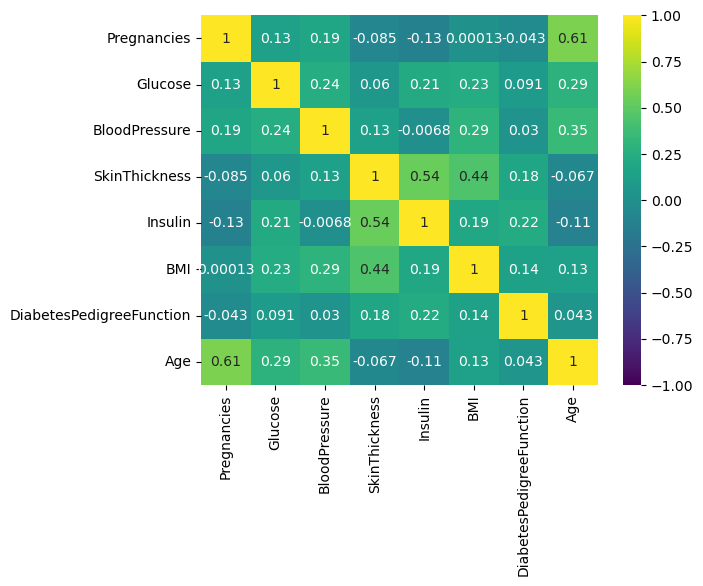

In [13]:
#Feature correlations
corr_mat=sns.heatmap(X.corr(method='spearman'),annot=True,cbar=True,
            cmap='viridis', vmax=1,vmin=-1,
            xticklabels=X.columns,yticklabels=X.columns)
corr_mat.set_xticklabels(corr_mat.get_xticklabels(),rotation=90)

In [14]:
#AFTER DATA WE HAVE TO PERFORM THE DATA STANDARIZATION (mean value to 1)PROCESS WHERE WE MAKE THE VALUES POF ALL 
#COLUMNS IN COMPRABLE RANGE
#BUT HERE ALL THE VALUE ARE ALREADY IN COMPRABLE RANGE .SO,THEIR IS NO NEED TO PERFORM STANDARIZATION
#PROCESS
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)


In [15]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [16]:
scaler=StandardScaler()

In [17]:
kk=scaler.fit(X)

In [18]:
kk.transform(X) #make value b/w zeros and one

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
#or directly
scaler.fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
#standard data
X=scaler.fit_transform(X)

In [21]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
X


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
#NOW TIME FOR GIVING DATA TO TRAINING AND TESTING
# TRAINING AND TEST DATA

#testsize=0.2 means give 20percent of data as test data and remaining 80percent as traing data
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=42)
#stratify=Y means data is splitted on the basis of rock and mine in equal manner
#random_state is used to splitted the data in particular order

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (576, 8) (192, 8)


In [27]:
print(X_train)
print(Y_train)#ytrain is realoutput

[[-0.84488505  0.00330087  0.45982725 ...  0.8893767  -0.63687146
  -0.44593516]
 [ 2.42174604 -1.02950492  0.25303625 ...  0.41977549 -0.28351757
   1.2558199 ]
 [-0.84488505 -0.40356202 -0.47073225 ...  0.44515934 -0.17177318
  -0.78628618]
 ...
 [-0.84488505 -0.74783062  0.04624525 ...  0.77514938 -0.76673656
  -0.27575966]
 [ 1.53084665  1.09870096  0.87340925 ...  0.29285624  2.16579867
   0.74529338]
 [ 0.04601433  0.72313521 -0.57412775 ... -0.31635613 -0.55834837
   0.31985461]]
751    0
358    0
718    0
536    0
651    0
      ..
676    1
113    0
556    0
152    1
107    0
Name: Outcome, Length: 576, dtype: int64


In [28]:
#model training 
#here we used logistic model
#LOGISTIC REGRESSION(CLASSIFICATION) MODEL WITH TRAINING DATA
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.7934
Logistic Regression:
trainAccuracy: 0.7951
Naive Bayes:
trainAccuracy: 0.7760
Support Vector Machine:
trainAccuracy: 0.8455
K-Nearest Neighbors:
trainAccuracy: 0.8177
Decision Tree:
trainAccuracy: 1.0000


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9809
AdaBoost:
trainAccuracy: 0.8524
Gradient Boosting:
trainAccuracy: 0.9323
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.7344
Logistic Regression:
testingAccuracy: 0.7344
Naive Bayes:
testingAccuracy: 0.7135
Support Vector Machine:
testingAccuracy: 0.7500


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
testingAccuracy: 0.7031
Decision Tree:
testingAccuracy: 0.7448
Random Forest:
testingAccuracy: 0.7604
Bagging:
testingAccuracy: 0.7656
AdaBoost:
testingAccuracy: 0.7344
Gradient Boosting:
testingAccuracy: 0.7292
Extra Trees:
testingAccuracy: 0.6615


In [29]:
model=LogisticRegression()

In [30]:
kk=model.fit(X_train,Y_train)

In [31]:
print(kk)

LogisticRegression()


In [32]:

#accuracy on training data
X_train_prediction=kk.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [33]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7951388888888888


<AxesSubplot:>

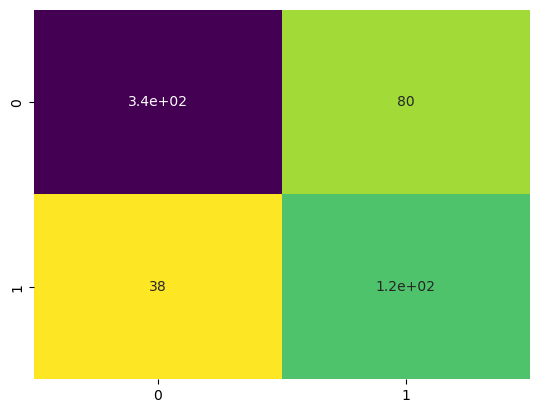

In [34]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_train_prediction,Y_train) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=kk.classes_, xticklabels=kk.classes_)

In [35]:
print(cm)

[[337  80]
 [ 38 121]]


In [36]:
#accuracy on test data
X_test_prediction=kk.predict(X_test)#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [37]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.734375


<AxesSubplot:>

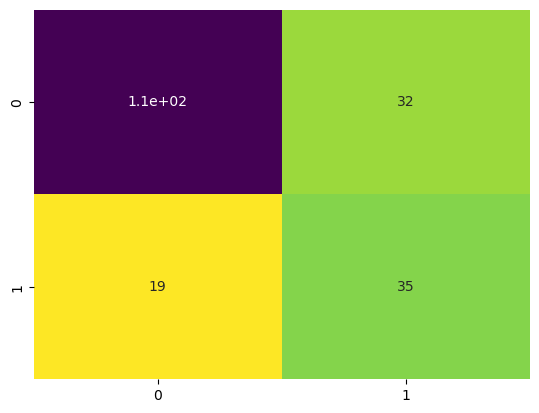

In [38]:
#Creating the Confusion matrix for testing
#le = LabelEncoder()

pp= confusion_matrix(X_test_prediction,Y_test) 
sns.heatmap(pp, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=kk.classes_, xticklabels=kk.classes_)

In [39]:
print(pp)

[[106  32]
 [ 19  35]]


<AxesSubplot:>

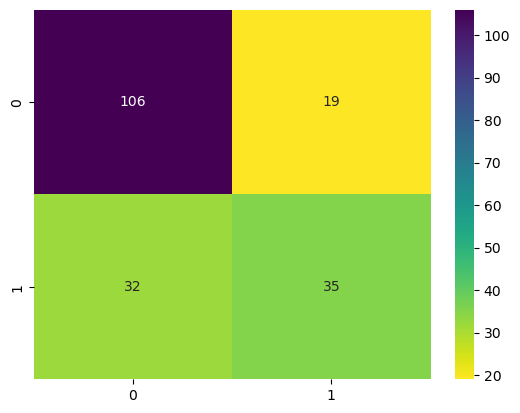

In [40]:
#Creating the Confusion matrix for overall accuracy this overall is similar to training dataset
##Predicting the test set result  
Ypred=kk.predict(X_test)
kp= confusion_matrix(Y_test,Ypred) 
sns.heatmap(kp, annot=True,fmt='g', cbar=True, cmap="viridis_r",
            yticklabels=kk.classes_, xticklabels=kk.classes_)

In [41]:
print(kp)

[[106  19]
 [ 32  35]]


In [42]:
#Accuracy
accuracy=accuracy_score(Ypred,Y_test)#or accuracy=accuracy_score(X_test,Y_test)

In [43]:
print("Overall accuracy :",accuracy)

Overall accuracy : 0.734375


In [44]:

precision=precision_score(Ypred,Y_test)

In [45]:
print("Overall precision:",precision)

Overall precision: 0.5223880597014925


In [46]:
#recall
recall=recall_score(Ypred,Y_test)

In [47]:
print("Overall recall:",recall)

Overall recall: 0.6481481481481481


In [48]:
f1_score=f1_score(Ypred,Y_test)

In [49]:
print("Overall f1_score:",f1_score)#sum of accuracy,precision ,recall

Overall f1_score: 0.5785123966942148


In [53]:
# making a predictive System
input_data=(6,148,72,35,0,33.6,0.627,50)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=scaler.transform(std_data)
print(std_data)
prediction=kk.predict(std_data)#model=LogisticRegression
print(prediction)
if(prediction==1):
    print("The person having  diabetes disease")
else:
    print("The person doesn't have diabetes disease ")


[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]]
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The person having  diabetes disease


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [52]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
